# Importing Libraries and Databases

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# creating a path
path=r'C:\Users\William\July-2023 Airbnb Amsterdam'

In [32]:
df_listings_dets=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'df_listings_dets_cleaned.csv'), index_col = False)

C:\Users\William\AppData\Local\Temp\ipykernel_7504\728640266.py:1: DtypeWarning: Columns (83) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listings_dets=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'df_listings_dets_cleaned.csv'), index_col = False)


# Data Prep for Regression Analysis

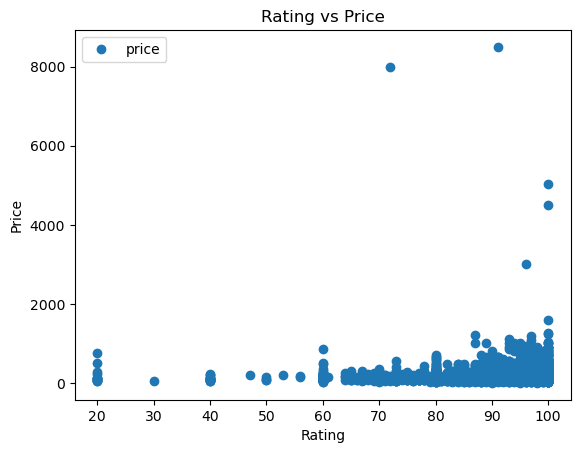

In [33]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_listings_dets.plot(x = 'review_scores_rating', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Rating vs Price')  
plt.xlabel('Rating')  
plt.ylabel('Price')  
plt.show()

#### Hypothesis: If the rating is higher, then the price will be higher.

In [50]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_listings_dets_2['review_scores_rating'].values.reshape(-1,1)
y = df_listings_dets_2['price'].values.reshape(-1,1)

In [51]:
X

array([[ 97.],
       [ 96.],
       [ 87.],
       ...,
       [100.],
       [100.],
       [100.]])

In [52]:
# checking for NaN
df_listings_dets['review_scores_rating'].isnull().sum()

0

In [53]:
# checking shape
df_listings_dets['review_scores_rating'].shape

(17375,)

In [54]:
# dropping NaN
df_listings_dets_2=df_listings_dets.dropna(subset = ['review_scores_rating'], inplace = False)

In [55]:
df_listings_dets_2['review_scores_rating'].isnull().sum()

0

In [56]:
# checking shape
df_listings_dets_2['review_scores_rating'].shape

(17375,)

In [57]:
y

array([[ 59],
       [160],
       [ 80],
       ...,
       [ 35],
       [212],
       [ 40]], dtype=int64)

In [58]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [59]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [60]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [61]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

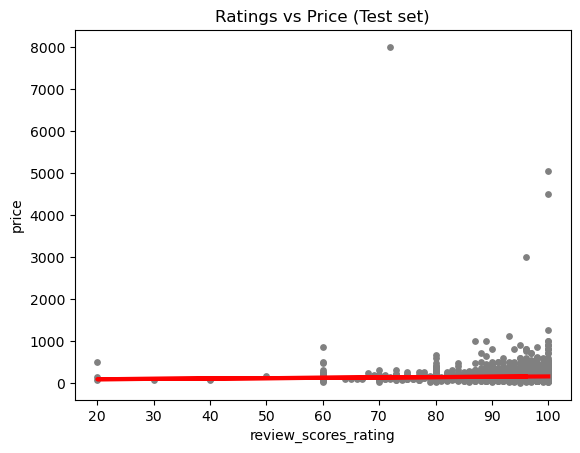

In [62]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Ratings vs Price (Test set)')
plot_test.xlabel('review_scores_rating')
plot_test.ylabel('price')
plot_test.show()

#### The regression line appears to be going slighty upward. It does seems to fit the data points well, regardless of the outliers. 

In [63]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [64]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.83033634]]
Mean squared error:  30024.240314672188
R2 score:  -0.0013792024870797892


In [65]:
y_predicted

array([[148.22570169],
       [147.39536535],
       [145.73469267],
       ...,
       [149.05603803],
       [151.54704706],
       [151.54704706]])

In [66]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,200,148.225702
1,85,147.395365
2,90,145.734693
3,44,151.547047
4,104,151.547047
5,125,145.734693
6,115,148.225702
7,149,147.395365
8,95,144.074020
9,89,149.886374


# Compare How the Regression Fits the Training Set

In [67]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [68]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [69]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.83033634]]
Mean squared error:  13241.376327960112
R2 score:  0.0023262871476102953


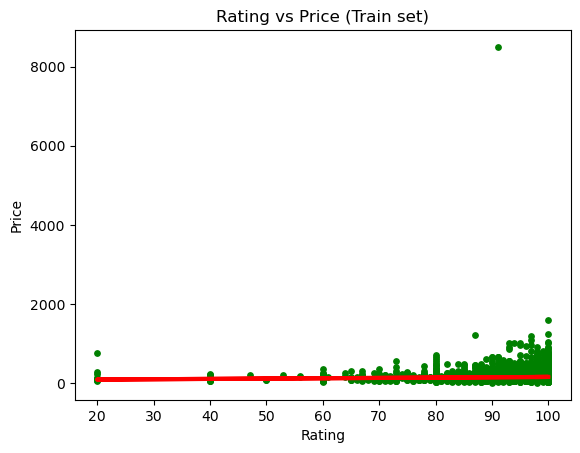

In [70]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Rating vs Price (Train set)')
plot_test.xlabel('Rating')
plot_test.ylabel('Price')
plot_test.show()

# Removing Outliers

In [74]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_listings_dets_2[df_listings_dets_2['review_scores_rating'] >=60] 

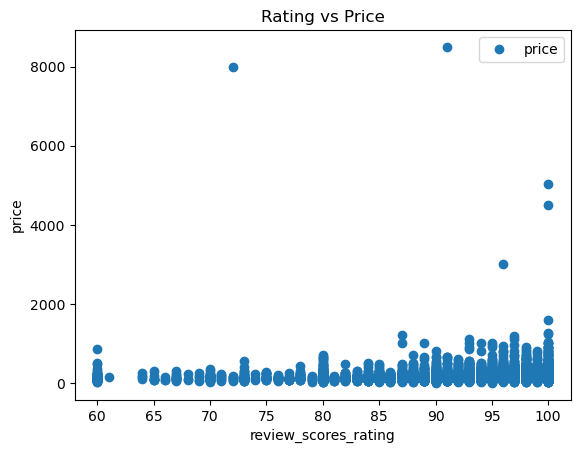

In [75]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'review_scores_rating', y='price', style='o')  
plt.title('Rating vs Price')  
plt.xlabel('review_scores_rating')  
plt.ylabel('price')  
plt.show()

In [76]:
# Reshape again.

X_2 = df_test['review_scores_rating'].values.reshape(-1,1)
y_2 = df_test['price'].values.reshape(-1,1)

In [77]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [78]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [79]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [80]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [81]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.09263368]]
Mean squared error:  43247.22463402175
R2 score:  -0.0015113015127541374


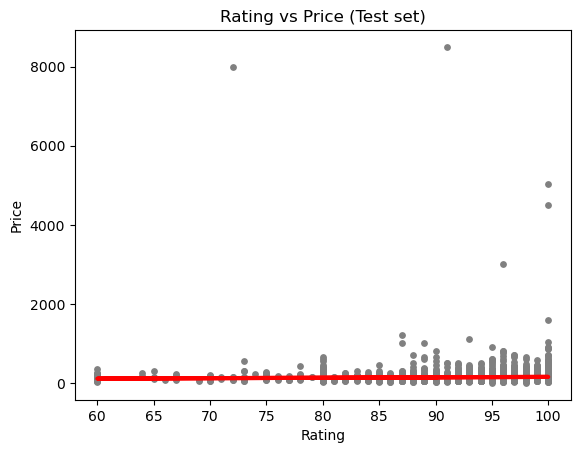

In [82]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Rating vs Price (Test set)')
plot_test.xlabel('Rating')
plot_test.ylabel('Price')
plot_test.show()

In [83]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,60,139.469037
1,200,141.654305
2,212,146.024839
3,200,152.580642
4,248,137.283770
5,175,139.469037
6,80,150.395374
7,50,148.210107
8,159,147.117473
9,120,144.932206


# Conclusion
#### It would appear that the models are not very accurate. The data is showing that even though a property might have a high rating, does not mean it will be a more expensive property to rent. The slope is more accurate after removing the "review_scores_rating" outliers. Because this data was "pre-cleaned" by Airbnb, bias is inherent because we do not know what they might have ommitted.